In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
import pandas as pd
import graphviz 
from sklearn import tree

In [10]:
nps = pd.read_csv("nps_df.csv")

In [11]:
#Vamos ter uma visão geral do dataset
nps.describe()

,age,salary,num_reclama_sac,target
count,20000.000000,20000.000000,20000.00000,20000.000000
mean,37.522147,5004.402664,2.73460,0.500000
std,16.525137,494.546667,2.73736,0.500013
min,-3.229341,3053.513022,0.00000,0.000000
25%,24.622656,4670.544578,1.00000,0.000000
50%,29.211314,5004.809172,2.00000,0.500000
75%,50.092705,5339.915932,4.00000,1.000000
max,109.422938,6960.538328,9.00000,1.000000


In [12]:
#Vamos preparar para o processo de modelagem
X_train, X_test, y_train, y_test = train_test_split(nps.drop(["target"], axis = 1),
                                                    nps.target,
                                                    test_size = 0.3
                                                   )

## Treinando o primeiro modelo

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
train_performance = dt.predict(X_train)
test_performance = dt.predict(X_test)
print(classification_report(y_train, train_performance)) 
print(classification_report(y_test, test_performance)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7011
           1       1.00      1.00      1.00      6989

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2989
           1       0.93      0.93      0.93      3011

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



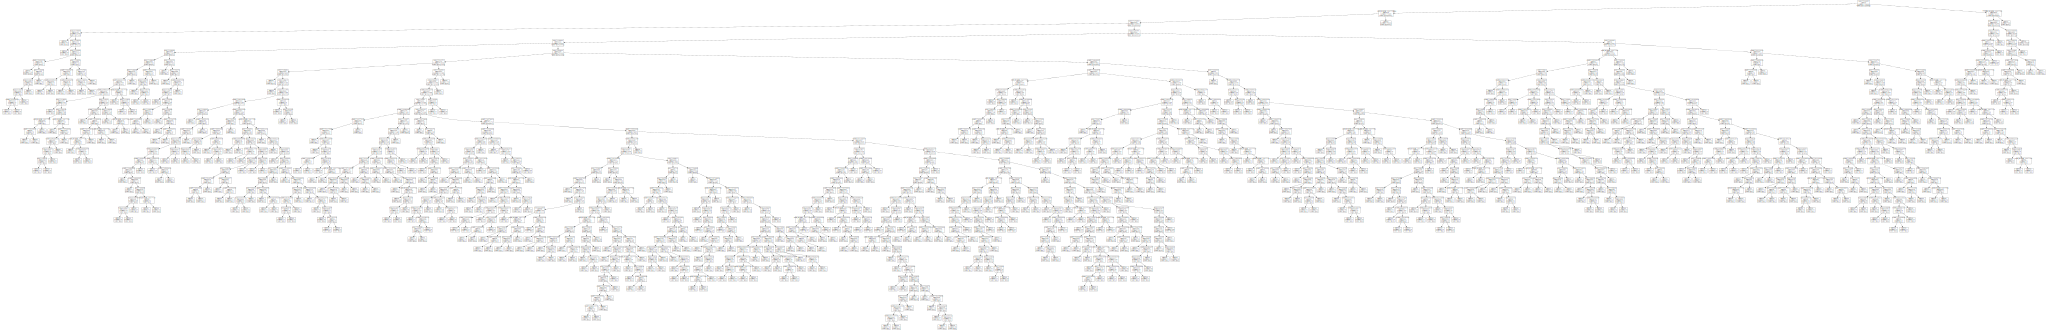

In [14]:
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=nps.drop(["target"],axis=1).columns) 
graph = graphviz.Source(dot_data)
graph

## Podar a árvore utilizando profundidade máxima

In [9]:
dt = DecisionTreeClassifier(max_depth = 3) #Poda da árvore para amenizar efeito de overfitting
dt.fit(X_train,y_train)
train_performance = dt.predict(X_train)
test_performance = dt.predict(X_test)
print(classification_report(y_train, train_performance)) 
print(classification_report(y_test, test_performance)) 

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      6989
           1       0.92      0.99      0.95      7011

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3011
           1       0.92      0.99      0.95      2989

    accuracy                           0.95      6000
   macro avg       0.96      0.95      0.95      6000
weighted avg       0.96      0.95      0.95      6000



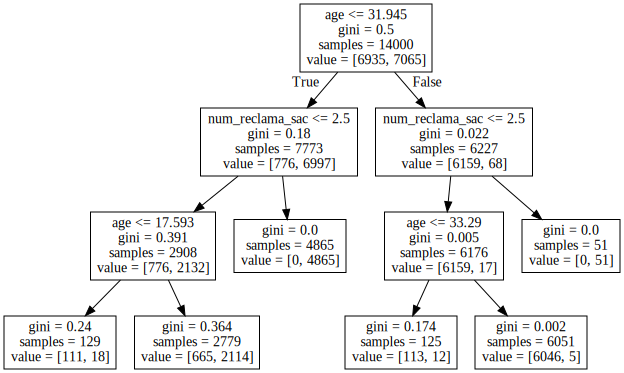

In [39]:
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=nps.drop(["target"],axis=1).columns) 
graph = graphviz.Source(dot_data)
graph

## Podar a árvore utilizando número mínimo de amostras por folha

In [17]:
min_samples_leaf_perc = int(X_train.shape[0]*0.01)

In [18]:
dt = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf_perc) #Poda da árvore para amenizar efeito de overfitting
dt.fit(X_train,y_train)
train_performance = dt.predict(X_train)
test_performance = dt.predict(X_test)
print(classification_report(y_train, train_performance)) 
print(classification_report(y_test, test_performance)) 

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      6989
           1       0.93      0.98      0.95      7011

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3011
           1       0.93      0.97      0.95      2989

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



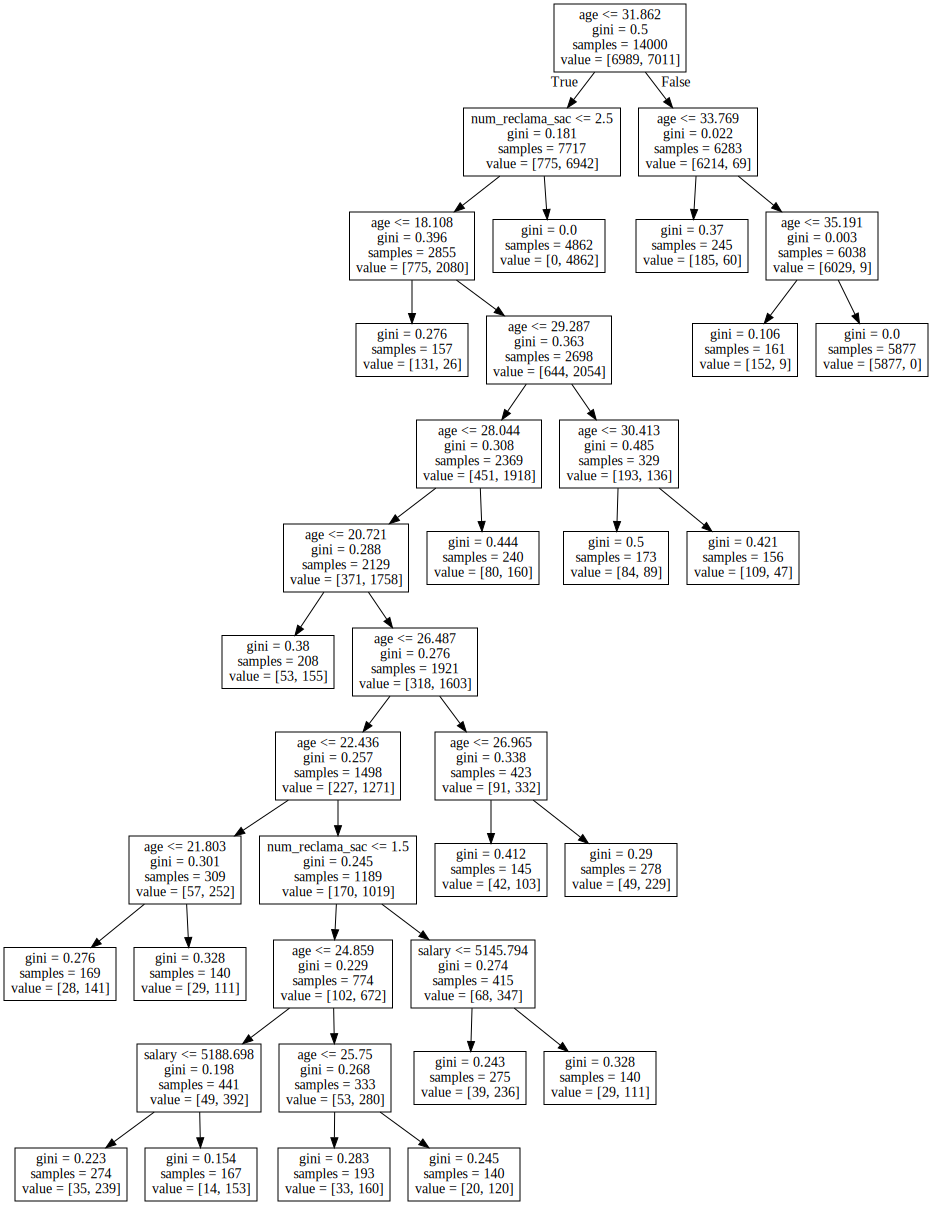

In [19]:
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=nps.drop(["target"],axis=1).columns) 
graph = graphviz.Source(dot_data)
graph